### Nathan Capstone Explore Notebook

In [3]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Hotel_Reviews.csv')

In [15]:
#df.head()

In [11]:
df.Tags = [[tag.strip().lower() for tag in (tags.replace('"','').replace("'","")
                                     .replace('[','') .replace(']','')
                                     .split(','))] for tags in df.Tags]


In [19]:
df.Tags[]

['leisure trip',
 'couple',
 'duplex double room',
 'stayed 2 nights',
 'submitted from a mobile device']

In [22]:
df['group_type'] = df.Tags.str[1]

In [1]:
#df.head()

In [24]:
df.group_type.isnull().sum()

6

In [4]:
pd.set_option('display.max_rows', None)
#df.group_type.value_counts()

In [35]:
df.Tags.str[0].value_counts()

leisure trip                  416672
business trip                  82748
couple                          5808
solo traveler                   4291
family with young children      2227
group                           1600
with a pet                      1405
family with older children       931
travelers with friends            56
Name: Tags, dtype: int64

In [33]:
trip_type = ['leisure trip', 'business trip']
if df.Tags.str[0].isin(trip_type):
    df['trip_type'] = df.Tags.str[0]
else:
    df['trip_type'] = 'unknown'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
trip_type = ['leisure trip', 'business trip']
df['leisure_trip'] = [for tag in df.Tags if tag in trip_type return tag else return 'unknown']

In [34]:
df.Tags.apply(len).value_counts()

5    297823
4    211564
3      5505
6       755
2        85
1         6
Name: Tags, dtype: int64

In [14]:
import re

In [28]:
def parse_tags(tags):
    tags = tags.lower()
    trip_type = 'unknown'
    if 'leisure trip' in tags:
        trip_type = 'leisure'
    elif 'buisness trip' in tags:
        trip_type = 'business'
    nights_stayed = np.nan
    if re.search(r'stayed\s*(\d+)\s*nights?', tags):
        nights_stayed = re.sub(r'.*stayed\s*(\d+)\s*nights?.*', r'\1', tags)
    group_type = 'unknown'
    if 'group' in tags:
        group_type = 'group'
    elif 'solo traveler' in tags:
        group_type = 'solo traveler'
    elif 'family with young children' in tags:
        group_type = 'family with young children'
    elif 'family with older children' in tags:
        group_type = 'family with older children'
    elif 'couple' in tags:
        group_type = 'couple'
    elif 'travelers with friends' in tags:
        group_type = 'travelers with friends'
    return dict(trip_type = trip_type, nights_stayed = nights_stayed, group_type = group_type)

In [29]:
pd.DataFrame(df.Tags.apply(parse_tags).tolist())

,trip_type,nights_stayed,group_type
0,leisure,6,couple
1,leisure,4,couple
2,leisure,3,family with young children
3,leisure,3,solo traveler
4,leisure,2,couple
...,...,...,...
515733,leisure,5,family with older children
515734,leisure,2,family with young children
515735,leisure,4,family with older children
515736,leisure,3,group


In [18]:
tags = df.Tags[0].lower()


In [19]:
re.sub(r'.*stayed\s*(\d+)\s*nights?.*', r'\1', tags)

'6'

In [1]:
import pandas as pd
import numpy as np
import wrangle

In [2]:
df = pd.read_csv('Hotel_Reviews.csv')

In [3]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
df = wrangle.wrangle_hotel(df)

In [5]:
#df.head()

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
df2 = df[df['hotel_name'] == 'Hilton London Metropole']
df2.head()

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,trip_type,nights_stayed,group_type,month,year,day_name,day,quarter,negative_unique_word_count,positive_unique_word_count,location
review_date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-04,225 Edgware Road Westminster Borough London W2...,1485,7.5,Hilton London Metropole,United Kingdom,First day the swimming pool was not opened th...,54,6977,The hotel was clean and accessible,8,4,7.5,"[' Leisure trip ', ' Group ', ' Superior Queen...",730,51.519569,-0.170521,leisure,2,group,August,2015,Tuesday,4,3,39,6,United Kingdom
2015-08-04,225 Edgware Road Westminster Borough London W2...,1485,7.5,Hilton London Metropole,Qatar,No Negative,0,6977,The room is too narrow and the room service d...,13,7,3.8,"[' Leisure trip ', ' Family with young childre...",730,51.519569,-0.170521,leisure,9,family with young children,August,2015,Tuesday,4,3,2,11,United Kingdom
2015-08-04,225 Edgware Road Westminster Borough London W2...,1485,7.5,Hilton London Metropole,United Kingdom,Drinks overly priced,5,6977,Stay was great hotel lovely staff very friend...,12,1,10.0,"[' Leisure trip ', ' Group ', ' King Hilton Gu...",730,51.519569,-0.170521,leisure,2,group,August,2015,Tuesday,4,3,3,10,United Kingdom
2015-08-04,225 Edgware Road Westminster Borough London W2...,1485,7.5,Hilton London Metropole,United Kingdom,Our room was very old and small I think they ...,23,6977,No Positive,0,5,5.8,"[' Business trip ', ' Couple ', ' King Hilton ...",730,51.519569,-0.170521,unknown,1,couple,August,2015,Tuesday,4,3,20,2,United Kingdom
2015-08-04,225 Edgware Road Westminster Borough London W2...,1485,7.5,Hilton London Metropole,United Kingdom,No Negative,0,6977,location,2,6,8.8,"[' Leisure trip ', ' Couple ', ' Executive Twi...",730,51.519569,-0.170521,leisure,2,couple,August,2015,Tuesday,4,3,2,1,United Kingdom


In [13]:
df.rename(columns={'additional_number_of_scoring':'hotel_score_count_no_review',
                   'average_score':'average_score_by_hotel',
                   'total_number_of_reviews':'total_count_reviews_by_hotel'}, inplace=True)



In [6]:
#df.head()

In [1]:
import pandas as pd
import numpy as np
import wrangle

In [2]:
df = pd.read_csv('Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [6]:
df = wrangle.wrangle_hotel(df)

Using cached csv file...


In [7]:
#df.head()

In [8]:
df2 = df[df['city'] == 'Amsterdam']

In [14]:
#df2.head()

In [11]:
df2.reviewer_nationality.value_counts()

 United Kingdom               23016
 United States of America      4792
 Ireland                       3029
 Australia                     2045
 Netherlands                   1733
                              ...  
 Ivory Coast                      1
 Bhutan                           1
 Afghanistan                      1
 Guadeloupe                       1
 Barbados                         1
Name: reviewer_nationality, Length: 180, dtype: int64

In [12]:
df2.hotel_name.value_counts()

Hotel Esther a                           1837
Best Western Premier Hotel Couture       1809
Ramada Apollo Amsterdam Centre           1704
Golden Tulip Amsterdam West              1686
Park Plaza Victoria Amsterdam            1595
                                         ... 
Amsterdam Canal Residence                  67
Hyatt Regency Amsterdam                    67
Pillows Anna van den Vondel Amsterdam      56
InterContinental Amstel Amsterdam          34
Hotel Seven One Seven                      17
Name: hotel_name, Length: 105, dtype: int64

In [13]:
df2.zip_code.value_counts()

1012 WJ    1837
1062 EA    1809
1057 PH    1704
1014 AG    1686
1012 LG    1595
           ... 
1017 XJ      67
1018 GV      67
1054 GZ      56
1018 GX      34
1017 JW      17
Name: zip_code, Length: 100, dtype: int64

In [15]:
df.trip_type.value_counts()

leisure    48703
unknown     8511
Name: trip_type, dtype: int64

<AxesSubplot:>

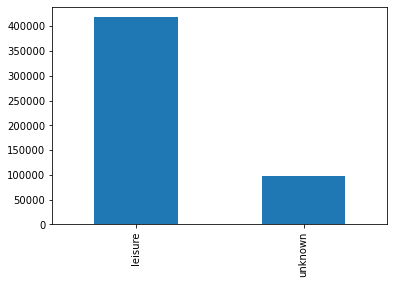

In [19]:
df.trip_type.value_counts().plot.bar()

In [16]:
df.nights_stayed.value_counts()

2     17789
3     16451
1     11687
4      6967
5      2397
6       914
7       573
8       172
9       101
10       50
11       24
12       16
14       14
13       13
15        7
19        2
17        2
20        1
18        1
28        1
29        1
27        1
22        1
26        1
21        1
16        1
Name: nights_stayed, dtype: int64

<AxesSubplot:>

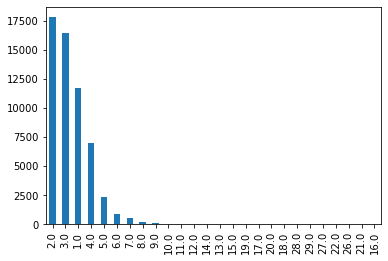

In [16]:
df2.nights_stayed.value_counts().plot.bar()

In [17]:
df2.group_type.value_counts()

couple                        29347
group                         10277
solo traveler                 10168
family with young children     4908
family with older children     2122
travelers with friends          392
Name: group_type, dtype: int64

<AxesSubplot:>

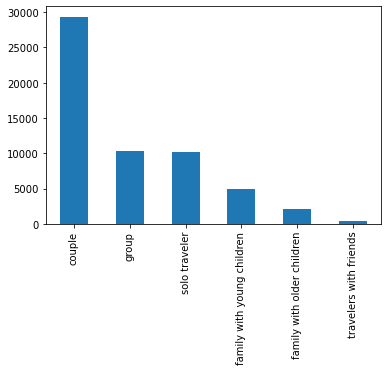

In [18]:
df2.group_type.value_counts().plot.bar()

In [20]:
df2.columns

Index(['additional_number_of_scoring', 'average_score', 'hotel_name',
       'reviewer_nationality', 'negative_review',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'positive_review', 'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'trip_type', 'nights_stayed',
       'group_type', 'month', 'year', 'day_name', 'day', 'quarter',
       'negative_unique_word_count', 'positive_unique_word_count', 'street',
       'city', 'zip_code', 'country', 'positive_clean_review',
       'negative_clean_review', 'positive_stem', 'negative_stem',
       'positive_lemma', 'negative_lemma', 'pos_sentiment_score',
       'neg_sentiment_score', 'pos_lem_sentiment_score',
       'neg_lem_sentiment_score'],
      dtype='object')

In [28]:
df2.groupby(df2.hotel_name).reviewer_score.mean().sort_values()

hotel_name
Savoy Hotel Amsterdam                  6.009465
NH Carlton Amsterdam                   7.011892
Best Western Blue Tower Hotel          7.330769
Best Western Plus Hotel Blue Square    7.351515
Golden Tulip Amsterdam Riverside       7.409289
                                         ...   
Canal House                            9.373370
The Hoxton Amsterdam                   9.433496
The Toren                              9.455750
Luxury Suites Amsterdam                9.482533
Waldorf Astoria Amsterdam              9.535211
Name: reviewer_score, Length: 105, dtype: float64

<AxesSubplot:ylabel='Frequency'>

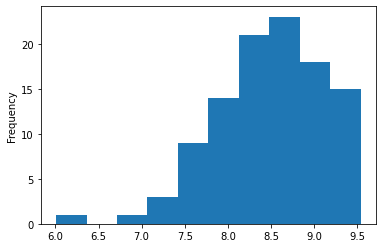

In [26]:
df2.groupby(df2.hotel_name).reviewer_score.mean().plot.hist()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

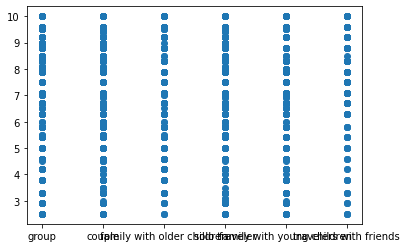

In [32]:
plt.scatter(data=df2, x='group_type', y='reviewer_score')

In [37]:
def plot_categorical_and_continuous_vars(df, cat_col, cont_col):
    fig, ax = plt.subplots(ncols=2, figsize=(14, 8))
    sns.boxplot(x=cat_col, y=cont_col, data=df, ax=ax[0])
    sns.barplot(x=cat_col, y=cont_col, data=df, ax=ax[1])
    return plt.show()

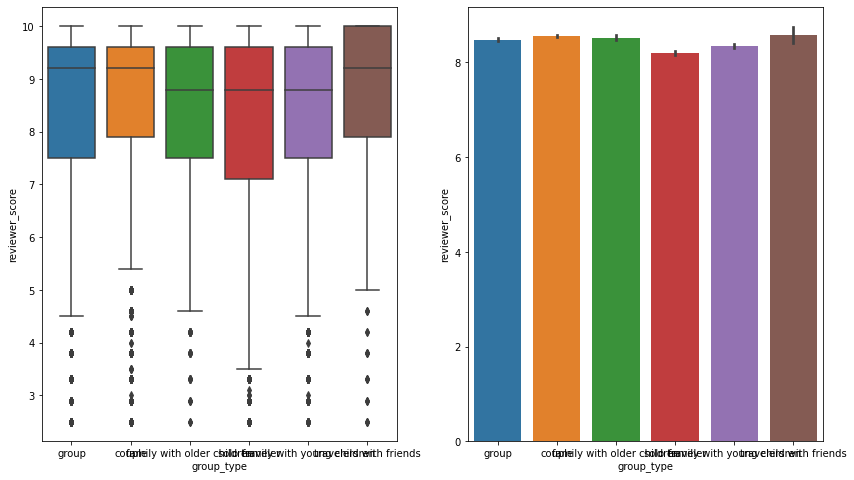

In [38]:
plot_categorical_and_continuous_vars(df2, 'group_type', 'reviewer_score' )

<AxesSubplot:xlabel='group_type', ylabel='reviewer_score'>

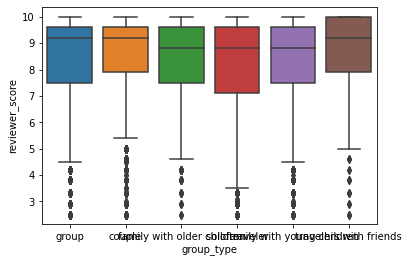

In [42]:

sns.boxplot(x='group_type', y='reviewer_score', data=df2)

<AxesSubplot:xlabel='trip_type', ylabel='reviewer_score'>

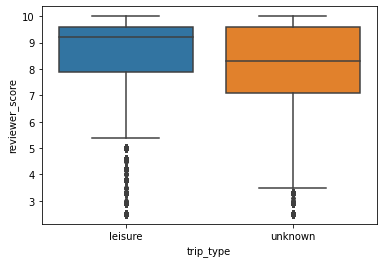

In [43]:
sns.boxplot(x='trip_type', y='reviewer_score', data=df2)

<AxesSubplot:xlabel='nights_stayed', ylabel='reviewer_score'>

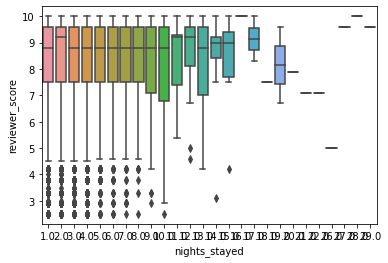

In [44]:
sns.boxplot(x='nights_stayed', y='reviewer_score', data=df2)

In [46]:
hotel_1 = df[df['hotel_name'] == 'Hotel Esther a']
hotel_1.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
24,834,9.1,Hotel Esther a,Canada,Staff were not as good at providing suggestio...,14,4687,NaN,0,1,...,NaN,staff good providing suggestions would expected,NaN,staff good provid suggest would expect,NaN,staff good providing suggestion would expected,0.0000,0.4404,0.0000,0.4404
25,834,9.1,Hotel Esther a,United Kingdom,NaN,0,4687,Free hot drinks and snacks Beautiful hotel on...,15,3,...,free hot drinks snacks beautiful hotel singel ...,NaN,free hot drink snack beauti hotel singel room ...,NaN,free hot drink snack beautiful hotel singel ro...,NaN,0.9001,0.0000,0.9001,0.0000
27,834,9.1,Hotel Esther a,United States of America,NaN,0,4687,I visited few EU countries during my trip and...,21,1,...,visited eu countries trip far best hotel stayed,NaN,visit eu countri trip far best hotel stay,NaN,visited eu country trip far best hotel stayed,NaN,0.6369,0.0000,0.6369,0.0000
28,834,9.1,Hotel Esther a,United States of America,NaN,0,4687,Location and staff,4,1,...,location staff,NaN,locat staff,NaN,location staff,NaN,0.0000,0.0000,0.0000,0.0000
33,834,9.1,Hotel Esther a,Argentina,NaN,0,4687,Everything,2,9,...,everything,NaN,everyth,NaN,everything,NaN,0.0000,0.0000,0.0000,0.0000


<AxesSubplot:xlabel='reviewer_nationality', ylabel='reviewer_score'>

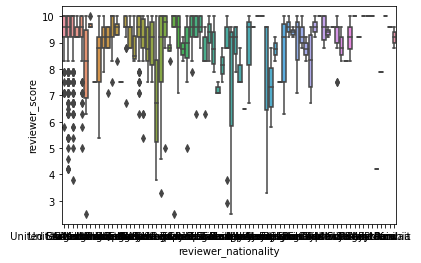

In [47]:
sns.boxplot(x='reviewer_nationality', y='reviewer_score', data=hotel_1)

<AxesSubplot:xlabel='nights_stayed', ylabel='reviewer_score'>

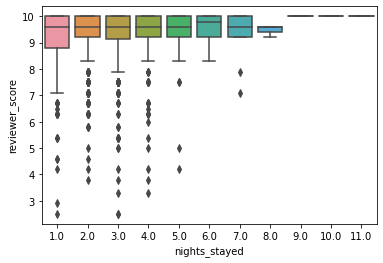

In [48]:
sns.boxplot(x='nights_stayed', y='reviewer_score', data=hotel_1)

<AxesSubplot:xlabel='trip_type', ylabel='reviewer_score'>

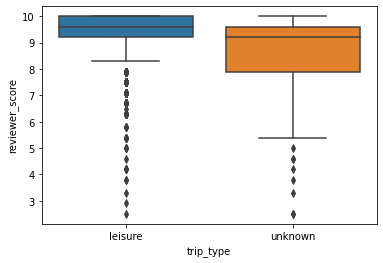

In [49]:
sns.boxplot(x='trip_type', y='reviewer_score', data=hotel_1)

<AxesSubplot:xlabel='group_type', ylabel='reviewer_score'>

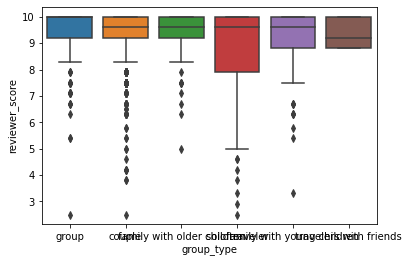

In [50]:
sns.boxplot(x='group_type', y='reviewer_score', data=hotel_1)

<AxesSubplot:xlabel='month'>

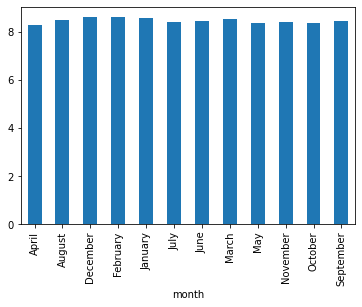

In [51]:
df2.groupby(df2.month).reviewer_score.mean().plot.bar()

<AxesSubplot:xlabel='total_number_of_reviews_reviewer_has_given', ylabel='reviewer_score'>

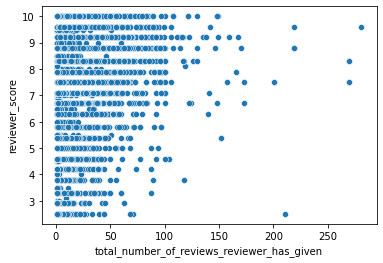

In [52]:
sns.scatterplot(x='total_number_of_reviews_reviewer_has_given', y='reviewer_score', data=df2)

In [62]:
hotel_group = df2[['hotel_name', 'average_score', 'total_number_of_reviews']]
hotel_group.head()

,hotel_name,average_score,total_number_of_reviews
3,Novotel Amsterdam City,7.8,2501
24,Hotel Esther a,9.1,4687
25,Hotel Esther a,9.1,4687
27,Hotel Esther a,9.1,4687
28,Hotel Esther a,9.1,4687


In [63]:
hotel_group.shape

(57214, 3)

In [65]:
hotel_group.drop_duplicates(inplace=True)
hotel_group

/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,hotel_name,average_score,total_number_of_reviews
3,Novotel Amsterdam City,7.8,2501
24,Hotel Esther a,9.1,4687
34,Grand Hotel Amr th Amsterdam,8.3,1530
82,Amsterdam Canal Residence,8.3,255
99,Grand Hotel Downtown,7.5,1270
...,...,...,...
260877,Hotel V Fizeaustraat,9.1,1708
349368,Sir Adam Hotel,9.0,361
379080,Pillows Anna van den Vondel Amsterdam,9.4,161
419179,Chasse Hotel,8.9,404


<AxesSubplot:xlabel='total_number_of_reviews', ylabel='average_score'>

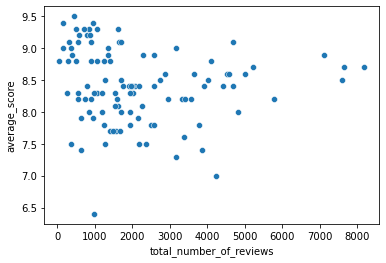

In [66]:
sns.scatterplot(x='total_number_of_reviews', y='average_score', data=hotel_group)

In [72]:
neg_df = df2[df2['neg_sentiment_score'] < -0.5]
neg_df.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
34,207,8.3,Grand Hotel Amr th Amsterdam,Ireland,The only fault I had with this hotel was with...,40,1530,The hotel was of an exceptionally high standa...,44,3,...,hotel exceptionally high standard every regard...,fault hotel th spa really disappointed teas sa...,hotel except high standard everi regard centra...,fault hotel th spa realli disappoint tea sage ...,hotel exceptionally high standard every regard...,fault hotel th spa really disappointed tea sag...,0.8773,-0.7727,0.8773,-0.8070
189,498,8.6,Mercure Amsterdam Sloterdijk Station,United Kingdom,health and safety issues trip hazards dirty c...,63,3643,nice staff in restaurant food ok,7,1,...,nice staff restaurant food ok,health safety issues trip hazards dirty cups u...,nice staff restaur food ok,health safeti issu trip hazard dirti cup un cl...,nice staff restaurant food ok,health safety issue trip hazard dirty cup un c...,0.6124,-0.5267,0.6124,-0.5267
190,498,8.6,Mercure Amsterdam Sloterdijk Station,United Kingdom,I have been charged twice for the booking onc...,69,3643,Good location friendly staff new hotel great ...,13,3,...,good location friendly staff new hotel great v...,charged twice booking time booking via booking...,good locat friendli staff new hotel great view...,charg twice book time book via book com 20 06 ...,good location friendly staff new hotel great v...,charged twice booking time booking via booking...,0.8807,-0.7506,0.8807,-0.7506
306,498,8.6,Mercure Amsterdam Sloterdijk Station,Malaysia,The acoustics A problem if you have noisy nei...,14,3643,Friendly and helpful staff Good size room,9,5,...,friendly helpful staff good size room,acoustics problem noisy neighbors banging doors,friendli help staff good size room,acoust problem noisi neighbor bang door,friendly helpful staff good size room,acoustic problem noisy neighbor banging door,0.8360,-0.5267,0.8360,-0.5267
320,297,8.3,Park Hotel,United Kingdom,Front desk staff was very unfriendly upon che...,79,2027,Conveniently located to where we needed to be,10,13,...,conveniently located needed,front desk staff unfriendly upon checkin appea...,conveni locat need,front desk staff unfriendli upon checkin appea...,conveniently located needed,front desk staff unfriendly upon checkin appea...,0.0000,-0.5859,0.0000,-0.5859


In [73]:
neg_df.shape

(3468, 38)

In [74]:
pos_df = df2[df2['pos_sentiment_score'] > 0.5]
pos_df.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
3,341,7.8,Novotel Amsterdam City,Austria,NaN,0,2501,Slightly out of the city center but very easy...,27,34,...,slightly city center easy get tram train reall...,NaN,slightli citi center easi get tram train reall...,NaN,slightly city center easy get tram train reall...,NaN,0.9414,0.0000,0.9414,0.000
25,834,9.1,Hotel Esther a,United Kingdom,NaN,0,4687,Free hot drinks and snacks Beautiful hotel on...,15,3,...,free hot drinks snacks beautiful hotel singel ...,NaN,free hot drink snack beauti hotel singel room ...,NaN,free hot drink snack beautiful hotel singel ro...,NaN,0.9001,0.0000,0.9001,0.000
27,834,9.1,Hotel Esther a,United States of America,NaN,0,4687,I visited few EU countries during my trip and...,21,1,...,visited eu countries trip far best hotel stayed,NaN,visit eu countri trip far best hotel stay,NaN,visited eu country trip far best hotel stayed,NaN,0.6369,0.0000,0.6369,0.000
34,207,8.3,Grand Hotel Amr th Amsterdam,Ireland,The only fault I had with this hotel was with...,40,1530,The hotel was of an exceptionally high standa...,44,3,...,hotel exceptionally high standard every regard...,fault hotel th spa really disappointed teas sa...,hotel except high standard everi regard centra...,fault hotel th spa realli disappoint tea sage ...,hotel exceptionally high standard every regard...,fault hotel th spa really disappointed tea sag...,0.8773,-0.7727,0.8773,-0.807
35,207,8.3,Grand Hotel Amr th Amsterdam,United Kingdom,NaN,0,1530,We arrived early and taken straight to the ro...,30,55,...,arrived early taken straight room wonderful re...,NaN,arriv earli taken straight room wonder recepti...,NaN,arrived early taken straight room wonderful re...,NaN,0.9501,0.0000,0.9501,0.000


In [83]:
pos_df.positive_lemma

3         slightly city center easy get tram train reall...
25        free hot drink snack beautiful hotel singel ro...
27            visited eu country trip far best hotel stayed
34        hotel exceptionally high standard every regard...
35        arrived early taken straight room wonderful re...
                                ...                        
515597    location cozy neighborhood make sure detour ar...
515630    advanced tv good shower soup quality good supe...
515637    location awesome cleaning crew great job front...
515710    really nice stay nh amsterdam zuid staff extre...
515737                         park outside hotel beautiful
Name: positive_lemma, Length: 38769, dtype: object

In [93]:
pos_df.positive_clean_review.value_counts()

great location                                                                                                                                                                                                                                 167
location great                                                                                                                                                                                                                                 104
bed comfortable                                                                                                                                                                                                                                 88
location perfect                                                                                                                                                                                                                                69
everything perfect          

In [94]:
import nltk
pos_bi = list(nltk.bigrams(pos_df.positive_clean_review))

<AxesSubplot:>

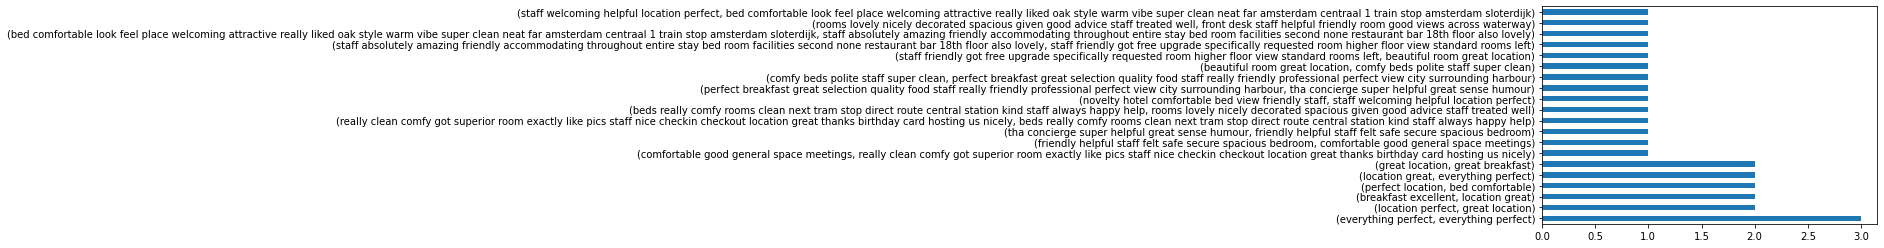

In [95]:
pd.Series(pos_bi).value_counts().head(20).plot.barh()

In [90]:
pos_df.positive_lemma.value_counts().head(20)

great location                   167
bed comfortable                  106
location great                   104
location perfect                  69
everything perfect                61
staff friendly helpful            56
excellent location                55
comfortable bed                   50
location excellent                50
friendly helpful staff            34
everything great                  32
staff helpful friendly            30
staff excellent                   28
perfect location                  27
great location friendly staff     24
bed amazing                       24
great breakfast                   24
great location helpful staff      22
perfect                           22
great staff                       20
Name: positive_lemma, dtype: int64

In [96]:
neg_df.negative_clean_review.value_counts().head(20)

nothing great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       23
nothing everything great                                                                                                                                                                                                                                                                                                                                                         

<AxesSubplot:>

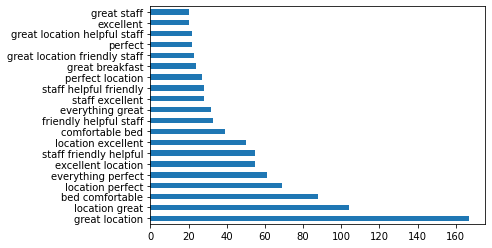

In [97]:
pd.Series(pos_df.positive_clean_review).value_counts().head(20).plot.barh()

<AxesSubplot:>

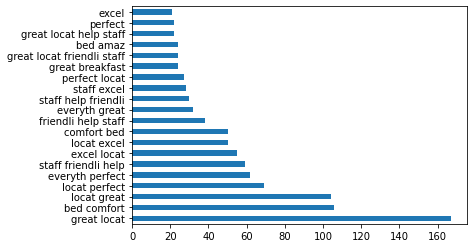

In [99]:
pd.Series(pos_df.positive_stem).value_counts().head(20).plot.barh()

<AxesSubplot:>

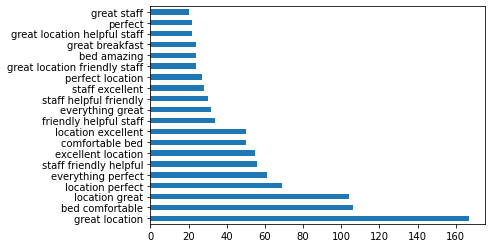

In [100]:
pd.Series(pos_df.positive_lemma).value_counts().head(20).plot.barh()

In [103]:
df = wrangle.wrangle_hotel(df)

Using cached csv file...


In [104]:
df.trip_type.value_counts()

leisure    417778
unknown     97960
Name: trip_type, dtype: int64

In [106]:
df2 = df[df['city'] == 'Amsterdam']
df2.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
3,341,7.8,Novotel Amsterdam City,Austria,NaN,0,2501,Slightly out of the city center but very easy...,27,34,...,slightly city center easy get tram train reall...,NaN,slightli citi center easi get tram train reall...,NaN,slightly city center easy get tram train reall...,NaN,0.9414,0.0000,0.9414,0.0000
24,834,9.1,Hotel Esther a,Canada,Staff were not as good at providing suggestio...,14,4687,NaN,0,1,...,NaN,staff good providing suggestions would expected,NaN,staff good provid suggest would expect,NaN,staff good providing suggestion would expected,0.0000,0.4404,0.0000,0.4404
25,834,9.1,Hotel Esther a,United Kingdom,NaN,0,4687,Free hot drinks and snacks Beautiful hotel on...,15,3,...,free hot drinks snacks beautiful hotel singel ...,NaN,free hot drink snack beauti hotel singel room ...,NaN,free hot drink snack beautiful hotel singel ro...,NaN,0.9001,0.0000,0.9001,0.0000
27,834,9.1,Hotel Esther a,United States of America,NaN,0,4687,I visited few EU countries during my trip and...,21,1,...,visited eu countries trip far best hotel stayed,NaN,visit eu countri trip far best hotel stay,NaN,visited eu country trip far best hotel stayed,NaN,0.6369,0.0000,0.6369,0.0000
28,834,9.1,Hotel Esther a,United States of America,NaN,0,4687,Location and staff,4,1,...,location staff,NaN,locat staff,NaN,location staff,NaN,0.0000,0.0000,0.0000,0.0000


In [39]:
#df3 = df[df['city'] == 'Vienna']
#df3.head()

<AxesSubplot:ylabel='Frequency'>

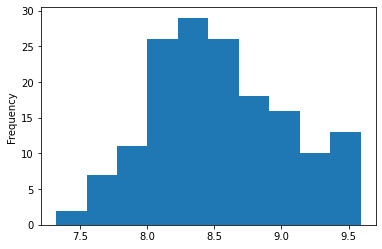

In [108]:
df3.groupby(df3.hotel_name).reviewer_score.mean().plot.hist()

<AxesSubplot:>

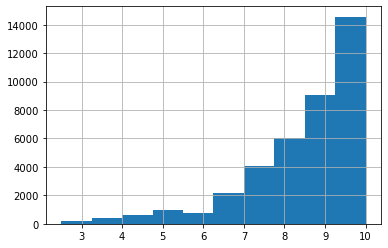

In [126]:
df3.reviewer_score.hist()

<AxesSubplot:>

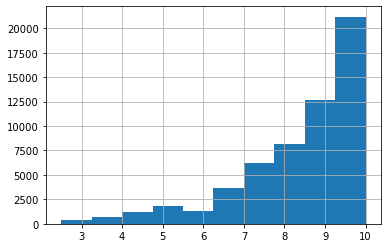

In [127]:
df2.reviewer_score.hist()

<AxesSubplot:xlabel='group_type', ylabel='reviewer_score'>

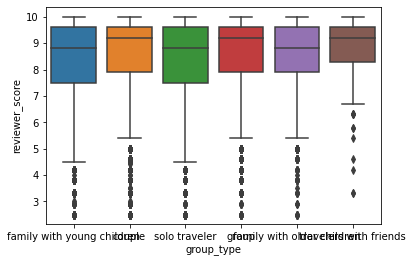

In [109]:
sns.boxplot(x='group_type', y='reviewer_score', data=df3)

<AxesSubplot:xlabel='group_type', ylabel='reviewer_score'>

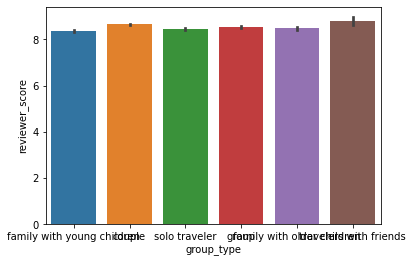

In [110]:
sns.barplot(x='group_type', y='reviewer_score', data=df3)

<AxesSubplot:xlabel='nights_stayed', ylabel='reviewer_score'>

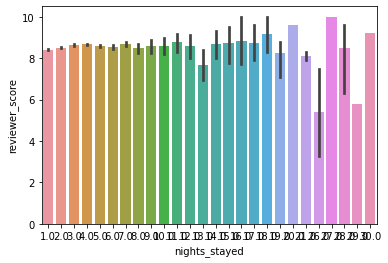

In [111]:
sns.barplot(x='nights_stayed', y='reviewer_score', data=df3)

<AxesSubplot:xlabel='month'>

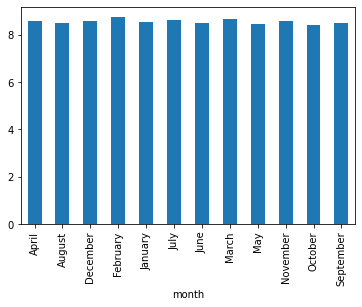

In [112]:
df3.groupby(df3.month).reviewer_score.mean().plot.bar()

<AxesSubplot:xlabel='total_number_of_reviews_reviewer_has_given', ylabel='reviewer_score'>

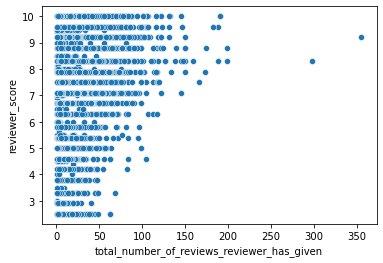

In [113]:
sns.scatterplot(x='total_number_of_reviews_reviewer_has_given', y='reviewer_score', data=df3)

In [114]:
hotel_group = df3[['hotel_name', 'average_score', 'total_number_of_reviews']]
hotel_group.head()

,hotel_name,average_score,total_number_of_reviews
2,Vienna Marriott Hotel,8.2,939
15,Austria Trend Hotel Doppio Wien,8.7,3010
26,Derag Livinghotel Kaiser Franz Joseph Vienna,8.0,1496
48,Austria Trend Hotel Bosei Wien,8.3,3287
49,Hotel Am Parkring,9.0,2304


In [115]:
hotel_group.drop_duplicates(inplace=True)
hotel_group

/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,hotel_name,average_score,total_number_of_reviews
2,Vienna Marriott Hotel,8.2,939
15,Austria Trend Hotel Doppio Wien,8.7,3010
26,Derag Livinghotel Kaiser Franz Joseph Vienna,8.0,1496
48,Austria Trend Hotel Bosei Wien,8.3,3287
49,Hotel Am Parkring,9.0,2304
...,...,...,...
45218,Roomz Vienna,8.1,568
190172,Hotel Am Schubertring,8.2,1259
210482,Mercure Hotel Raphael Wien,8.5,1264
339672,Hotel Bellevue Wien,8.1,388


<AxesSubplot:xlabel='total_number_of_reviews', ylabel='average_score'>

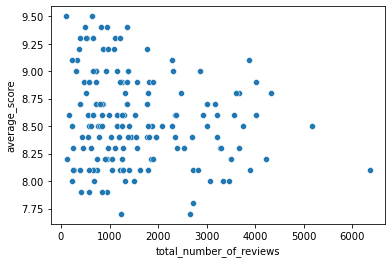

In [116]:
sns.scatterplot(x='total_number_of_reviews', y='average_score', data=hotel_group)

In [117]:
df3.average_score.min()

7.7

In [118]:
df3.reviewer_score.min()

2.5

In [119]:
df3.reviewer_nationality.value_counts()

 United Kingdom               7507
 United States of America     3104
 Romania                      1807
 Australia                    1680
 United Arab Emirates         1163
                              ... 
 Afghanistan                     1
 Madagascar                      1
 U S Virgin Islands              1
 Togo                            1
 San Marino                      1
Name: reviewer_nationality, Length: 174, dtype: int64

In [121]:
local = df3[df3['reviewer_nationality'] == 'Austria']
local.shape

(0, 38)

In [125]:
local2 = df2[df2['reviewer_nationality'] == 'Netherlands']
local2.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score


In [124]:
uk = df3[df3['reviewer_nationality'] == 'United Kingdom']
uk.shape

(0, 38)

<AxesSubplot:>

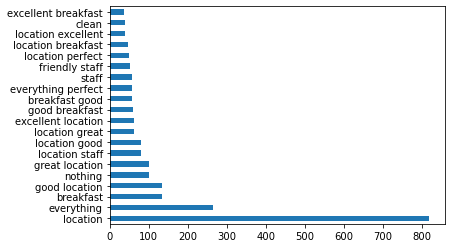

In [128]:
pd.Series(df3.positive_clean_review).value_counts().head(20).plot.barh()

<AxesSubplot:>

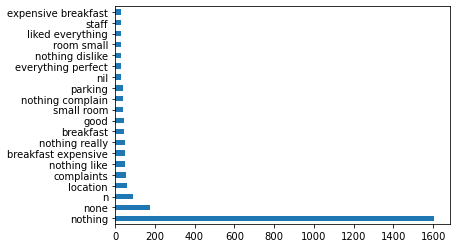

In [129]:
pd.Series(df3.negative_clean_review).value_counts().head(20).plot.barh()

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#import wrangle
import unicodedata
from nltk.corpus import stopwords
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Hotel_Reviews.csv')

In [8]:
#df.head()

In [4]:
def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    string = re.sub(r'[\s]', ' ', string).strip()
    #string = re.split(r'\s+', string)
    return string

In [5]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)

    return string

In [6]:
def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

In [7]:
def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [8]:
def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [9]:
df['Positive_Review'] = [review.replace('No Positive', '') for review in df.Positive_Review]
df['Negative_Review'] = [review.replace('No Negative', '') for review in df.Negative_Review]

In [9]:
#df.head()

In [11]:
df['positive_clean_review'] = df['Positive_Review'].apply(basic_clean)
df['negative_clean_review'] = df['Negative_Review'].apply(basic_clean)

In [10]:
#df.head()

In [13]:
df.positive_clean_review[0]

'only the park outside of the hotel was beautiful'

In [14]:
type(df.positive_clean_review[0])

str

In [15]:
df['positive_clean_review'] = df['positive_clean_review'].apply(tokenize)
df['negative_clean_review'] = df['negative_clean_review'].apply(tokenize)

In [16]:
df.positive_clean_review[0]

'only the park outside of the hotel was beautiful'

In [17]:
type(df.positive_clean_review[0])

str

In [18]:
df['positive_clean_review'] = df['positive_clean_review'].apply(remove_stopwords)
df['negative_clean_review'] = df['negative_clean_review'].apply(remove_stopwords)

In [19]:
df.positive_clean_review[0]

'park outside hotel beautiful'

In [20]:
type(df.positive_clean_review[0])

str

In [21]:
df.positive_clean_review[1]

'real complaints hotel great great location surroundings rooms amenities service two recommendations however firstly staff upon check confusing regarding deposit payments staff offer upon checkout refund original payment make new one bit confusing secondly site restaurant bit lacking well thought excellent quality food anyone vegetarian vegan background even wrap toasted sandwich option would great aside minor minor things fantastic spot back return amsterdam'

In [30]:
df.positive_clean_review[2]

'location good staff ok cute hotel breakfast range nice go back'

In [31]:
df.positive_clean_review[3]

'great location nice surroundings bar restaurant nice lovely outdoor area building also quite character'

In [32]:
df.positive_clean_review[20]

'friendly staff oostpark yards away good continental breakfast selection quiet relaxing area'

In [31]:
df.positive_clean_review.value_counts().head(10)

                  36624
location          14090
everything         3364
nothing            1809
good location      1730
great location     1717
location good      1190
breakfast          1066
location staff     1056
friendly staff     1013
Name: positive_clean_review, dtype: int64

In [34]:
df[df.positive_clean_review == 'location'].shape

(14090, 19)

In [22]:
pos_reviews = ' '.join(df.positive_clean_review)

In [11]:
#pos_reviews

In [27]:
pos_reviews = pos_reviews.split()

In [35]:
pd.Series(pos_reviews).value_counts().head(20)

staff          194574
location       192856
room           140746
hotel          125326
good           112321
great          105641
friendly        85353
breakfast       84581
helpful         76183
nice            69449
clean           66929
excellent       62272
comfortable     59952
bed             49926
rooms           40370
lovely          35096
stay            32031
close           30971
station         29312
really          28224
dtype: int64

<AxesSubplot:>

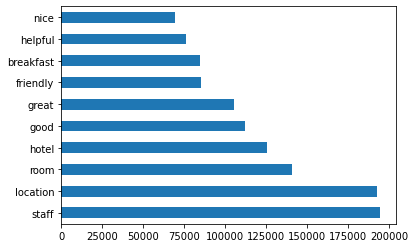

In [29]:
pd.Series(pos_reviews).value_counts().head(10).plot.barh()

In [35]:
df['positive_lemma'] = [lemmatize(review) for review in df.positive_clean_review]
df['negative_lemma'] = [lemmatize(review) for review in df.negative_clean_review]


In [36]:
df.positive_lemma.value_counts().head(20)

                          36624
location                  14112
everything                 3364
nothing                    1813
good location              1733
great location             1719
location good              1194
breakfast                  1077
location staff             1063
friendly staff             1025
location great              940
staff                       869
bed comfortable             779
location excellent          699
staff friendly              684
staff friendly helpful      667
excellent location          652
bed comfy                   652
staff helpful               621
breakfast good              580
Name: positive_lemma, dtype: int64

<AxesSubplot:>

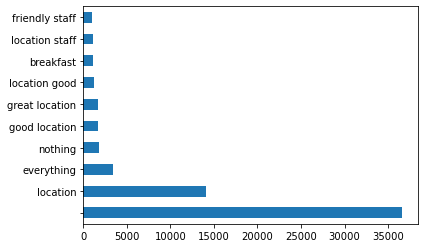

In [37]:
df.positive_lemma.value_counts().head(10).plot.barh()

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import wrangle
import unicodedata
from nltk.corpus import stopwords

In [2]:
df = wrangle.wrangle_hotel()
df.head()

TypeError: replace() argument 1 must be str, not list

In [3]:
df.columns

Index(['month_name', 'month', 'year', 'day_name', 'day', 'quarter',
       'hotel_name', 'street', 'city', 'zip_code', 'country', 'lat', 'lng',
       'additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'reviewer_nationality', 'trip_type',
       'nights_stayed', 'group_type',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'neg_sentiment_score', 'neg_lem_sentiment_score',
       'review_total_negative_word_counts', 'negative_unique_word_count',
       'pos_sentiment_score', 'review_total_positive_word_counts',
       'positive_unique_word_count', 'pos_lem_sentiment_score',
       'negative_review', 'negative_clean_review', 'negative_stem',
       'negative_lemma', 'positive_review', 'positive_clean_review',
       'positive_stem', 'positive_lemma'],
      dtype='object')

In [8]:
df.positive_clean_review.fillna('', inplace=True)
df.negative_clean_review.fillna('', inplace=True)

In [6]:
pos_reviews = ' '.join(df.positive_clean_review)
pos_reviews = pos_reviews.split()
pd.Series(pos_reviews).value_counts().head(20)

staff          194574
location       192856
room           140746
hotel          125326
good           112321
great          105641
friendly        85353
breakfast       84581
helpful         76183
nice            69449
clean           66929
excellent       62272
comfortable     59952
bed             49926
rooms           40370
lovely          35096
stay            32031
close           30971
station         29312
really          28224
dtype: int64

<AxesSubplot:>

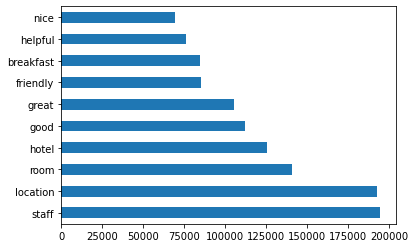

In [7]:
pd.Series(pos_reviews).value_counts().head(10).plot.barh()

In [13]:
neg_reviews = ' '.join(df.negative_clean_review) 
neg_reviews = neg_reviews.split()
pd.Series(neg_reviews).value_counts().head(20)

room         176026
hotel         74709
breakfast     58478
small         49880
staff         39512
nothing       38768
rooms         34802
would         32291
could         32079
bed           29828
one           28095
bit           27546
bathroom      26585
night         24063
little        22536
like          22445
shower        21290
good          20821
us            20225
get           19504
dtype: int64

<AxesSubplot:>

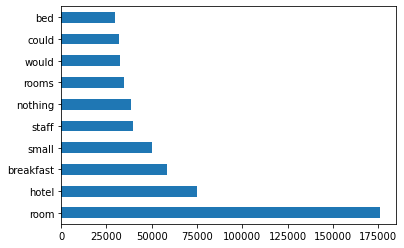

In [11]:
pd.Series(neg_reviews).value_counts().head(10).plot.barh()

In [16]:
pos_bigrams = (pd.Series(nltk.ngrams(pos_reviews, 2)).value_counts().head(20))
pos_bigrams.head(20)

(great, location)        30992
(friendly, staff)        25238
(staff, friendly)        24828
(friendly, helpful)      21450
(good, location)         21091
(helpful, staff)         17820
(staff, helpful)         16788
(excellent, location)    12891
(location, great)        12811
(location, good)         11604
(location, staff)         9457
(breakfast, good)         9417
(good, breakfast)         9335
(comfortable, bed)        9006
(location, excellent)     8936
(staff, great)            8832
(room, clean)             8601
(walking, distance)       8406
(bed, comfortable)        7481
(helpful, friendly)       7368
dtype: int64

In [17]:
neg_bigrams = (pd.Series(nltk.ngrams(neg_reviews, 2)).value_counts().head(20))
neg_bigrams.head(20)

(room, small)            9658
(room, service)          6324
(small, room)            6024
(air, conditioning)      5524
(booking, com)           4469
(star, hotel)            3999
(tea, coffee)            3948
(rooms, small)           3415
(4, star)                3234
(air, con)               3185
(breakfast, included)    3069
(even, though)           2972
(front, desk)            2914
(room, bit)              2820
(double, bed)            2820
(could, better)          2793
(little, bit)            2764
(bit, small)             2762
(would, nice)            2730
(mini, bar)              2723
dtype: int64

In [18]:
pos_trigrams = (pd.Series(nltk.ngrams(pos_reviews, 3)).value_counts().head(20))
pos_trigrams.head(20)

(staff, friendly, helpful)     9667
(friendly, helpful, staff)     7191
(location, friendly, staff)    4081
(staff, helpful, friendly)     3189
(staff, great, location)       3170
(hotel, great, location)       2777
(good, value, money)           2553
(within, walking, distance)    2403
(friendly, staff, good)        2080
(would, definitely, stay)      2049
(staff, good, location)        2019
(friendly, staff, great)       2008
(helpful, friendly, staff)     1977
(staff, extremely, helpful)    1960
(great, location, friendly)    1760
(nothing, much, trouble)       1639
(hotel, good, location)        1561
(location, great, staff)       1524
(location, great, location)    1500
(location, staff, friendly)    1455
dtype: int64

In [20]:
neg_trigrams = (pd.Series(nltk.ngrams(neg_reviews, 3)).value_counts().head(20))
neg_trigrams.head(20)

(4, star, hotel)                1915
(room, bit, small)              1170
(room, little, small)            907
(tea, coffee, making)            892
(5, star, hotel)                 874
(coffee, making, facilities)     873
(room, quite, small)             768
(making, facilities, room)       768
(tea, coffee, facilities)        655
(two, single, beds)              650
(breakfast, included, price)     595
(breakfast, could, better)       535
(4, stars, hotel)                507
(beds, pushed, together)         503
(front, desk, staff)             490
(four, star, hotel)              489
(tea, coffee, room)              484
(far, city, center)              475
(tea, making, facilities)        444
(air, conditioning, room)        441
dtype: int64

In [21]:
pos_quadgrams = (pd.Series(nltk.ngrams(pos_reviews, 4)).value_counts().head(20))
pos_quadgrams.head(20)

(great, location, friendly, staff)        1187
(location, friendly, helpful, staff)      1069
(friendly, staff, great, location)        1037
(staff, friendly, helpful, room)           830
(staff, friendly, helpful, location)       812
(friendly, staff, good, location)          745
(good, location, friendly, staff)          711
(helpful, staff, great, location)          683
(staff, extremely, friendly, helpful)      603
(location, staff, friendly, helpful)       568
(friendly, helpful, staff, great)          567
(friendly, helpful, staff, good)           541
(excellent, location, friendly, staff)     538
(hotel, staff, friendly, helpful)          508
(staff, really, friendly, helpful)         486
(staff, friendly, helpful, breakfast)      466
(friendly, helpful, staff, location)       444
(helpful, staff, good, location)           426
(friendly, staff, excellent, location)     425
(staff, friendly, helpful, hotel)          417
dtype: int64

In [22]:
neg_quadgrams = (pd.Series(nltk.ngrams(neg_reviews, 4)).value_counts().head(20))
neg_quadgrams.head(20)

(tea, coffee, making, facilities)     728
(coffee, making, facilities, room)    518
(tea, coffee, facilities, room)       370
(single, beds, pushed, together)      318
(tea, making, facilities, room)       218
(two, single, beds, pushed)           183
(room, little, bit, small)            171
(two, singles, pushed, together)      155
(bit, far, city, center)              124
(coffee, tea, making, facilities)     115
(breakfast, included, room, rate)     112
(2, single, beds, pushed)             109
(walls, thin, could, hear)            109
(room, little, small, side)           105
(room, two, single, beds)             102
(expect, 4, star, hotel)              100
(far, away, city, center)              88
(bit, far, city, centre)               87
(tea, coffee, making, facility)        87
(bed, two, single, beds)               86
dtype: int64

In [23]:
pos_pentagrams = (pd.Series(nltk.ngrams(pos_reviews, 5)).value_counts().head(20))
pos_pentagrams.head(20)

(great, location, friendly, helpful, staff)        319
(friendly, helpful, staff, great, location)        299
(staff, friendly, helpful, great, location)        212
(staff, friendly, helpful, room, clean)            178
(friendly, helpful, staff, good, location)         177
(excellent, location, friendly, helpful, staff)    165
(good, location, friendly, helpful, staff)         151
(great, location, staff, friendly, helpful)        125
(staff, friendly, helpful, good, location)         119
(staff, friendly, helpful, breakfast, good)        114
(friendly, helpful, staff, good, breakfast)        113
(staff, friendly, helpful, location, great)        113
(location, great, staff, friendly, helpful)        103
(great, location, within, walking, distance)       100
(friendly, helpful, staff, excellent, location)     99
(great, location, friendly, staff, good)            96
(staff, friendly, helpful, location, excellent)     90
(location, excellent, staff, friendly, helpful)     85
(great, lo

In [24]:
neg_pentagrams = (pd.Series(nltk.ngrams(neg_reviews, 5)).value_counts().head(20))
neg_pentagrams.head(20)

(tea, coffee, making, facilities, room)     436
(two, single, beds, pushed, together)       179
(2, single, beds, pushed, together)         108
(bed, two, singles, pushed, together)        74
(two, single, beds, put, together)           57
(coffee, tea, making, facilities, room)      56
(tea, coffee, making, facility, room)        53
(double, bed, two, single, beds)             51
(double, bed, two, singles, pushed)          42
(would, expect, 4, star, hotel)              39
(room, two, single, beds, pushed)            37
(would, liked, tea, coffee, making)          37
(bed, 2, singles, pushed, together)          34
(room, tea, coffee, making, facilities)      32
(tea, coffee, making, facilities, rooms)     30
(liked, tea, coffee, making, facilities)     30
(could, hear, people, next, door)            28
(location, bit, far, city, center)           28
(two, twin, beds, pushed, together)          28
(could, hear, people, next, room)            25
dtype: int64

In [13]:
#df.head()

In [26]:
df.columns


Index(['additional_number_of_scoring', 'average_score', 'hotel_name',
       'reviewer_nationality', 'negative_review',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'positive_review', 'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'trip_type', 'nights_stayed',
       'group_type', 'month', 'year', 'day_name', 'day', 'quarter',
       'negative_unique_word_count', 'positive_unique_word_count', 'street',
       'city', 'zip_code', 'country', 'positive_clean_review',
       'negative_clean_review', 'positive_stem', 'negative_stem',
       'positive_lemma', 'negative_lemma', 'pos_sentiment_score',
       'neg_sentiment_score', 'pos_lem_sentiment_score',
       'neg_lem_sentiment_score'],
      dtype='object')

In [27]:
def nps_group(reviewer_score):
    if reviewer_score > 8.9:
        nps_group = 'promoter'
    elif reviewer_score > 6.9:
        nps_group = 'passive'
    elif reviewer_score >= 0:
        nps_group = 'detractor'
    else:
        nps_group = 'no group'
    return nps_group

In [28]:
df['nps_group'] = df.reviewer_score.apply(nps_group)

In [12]:
#df.head()

In [30]:
df.nps_group.value_counts()

promoter     247037
passive      181850
detractor     86851
Name: nps_group, dtype: int64

In [31]:
(247037 - 86851) / (247037 + 181850 + 86851)

0.31059569005968146

In [35]:
df.reviewer_score[2]

10.0

In [3]:
247037 + 181850 + 86851

515738

In [4]:
247037 / 515738

0.4789970876685449

In [5]:
86851 / 515738

0.1684013976088634

In [6]:
.48 - .17

0.30999999999999994